# Task 1: Implementing Backtracking

In [1]:
# 1. The objective function is f(x) = x[0]**2 + x[1]**4
# 2. The optimal solution is (0, 0) obviously.

import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

In [2]:
"""
@def   : objective function 
@param : x is vector 
@return: a scalar
"""
def objective_func(x):
    return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2

In [3]:
"""
@def   : gradient of objective function 
@param : x is vector 
@return: a vector 
"""
def grad_objective_func(x):
    return np.array([10*x[0] + 8*x[1] - 34, 8*x[0] + 10*x[1] - 38])

In [4]:
"""
@def   : hessian of objective function 
@param : x is vector 
@return: a matrix 
"""
def hessian_func(x):
    return np.matrix([
        [10, 8], [8, 10]
    ])

In [5]:
# Define a backtracking function
def backtracking(f, grad, p, x, c1, ro):
    a = 1
    while f(x + a*p) > f(x) + c1*a*np.matmul(p,grad(x)):
        a = ro*a
    return a

# Task 2: Backtracking Steepest Descent

In [6]:
# The stopping criteria is selected to be 1e-9 for the gradient norm.
# The starting point is [5, 5] for this problem
# The optimal solution is [0., 0.].

x0 = np.array([0, 0])
x_opt = np.array([1., 3.])
tol = 1e-9
c1 = 1e-4
ro = 0.1

In [7]:
"""
@def   : exact steepest descent method
@param : x is vector 
@return: a vector 
"""
def backtracking_steepest_descent(x0):  
    x = x0           
    p = -grad_objective_func(x) 
    global count
    count = 0
    while norm(p) > 1e-9:                                       
        a = backtracking(objective_func, grad_objective_func, p, x, c1, ro) 
        x = x + a*p                   
        p = -grad_objective_func(x)         
        count += 1
    print("iterations:", count)
    return x


x = backtracking_steepest_descent(x0)
print(x)

ro = 0.5
x = backtracking_steepest_descent(x0)
print(x)

ro = 0.9
x = backtracking_steepest_descent(x0)
print(x)

iterations: 111
[1. 3.]
iterations: 55
[1. 3.]
iterations: 798
[1. 3.]


In [8]:
"""
@def   : exact steepest descent method
@param : x is vector 
@return: a vector 
"""
def exact_steepest_descent(x0):             
    x = x0                                  
    p = -grad_objective_func(x) 
    global count
    count = 0
    while norm(p) > 1e-9:                  
        def subproblem1d(alpha):            
            return objective_func(x + alpha * p)  
                                            
        res = minimize_scalar(subproblem1d) 
        x = x + res.x * p                   
        p = -grad_objective_func(x) 
        count += 1
    print("iterations:", count)
    return x


x = exact_steepest_descent(x0)
print(x)

iterations: 13
[1. 3.]


In [9]:
alpha = 1e-3
"""
@def   : inexact steepest descent method
@param : x is vector 
@return: a vector 
"""
def inexact_steepest_descent(x0):              
    x = x0                                   
    p = -grad_objective_func(x) 
    global count
    count = 0
    while norm(p) > 1e-9:                    
        x = x + alpha * p                    
        p = -grad_objective_func(x)          
        count += 1
    print("iterations:", count)
    return x


x = inexact_steepest_descent(x0)
print(x)

iterations: 10871
[1. 3.]


a) The running time is certainly more than exact steepest descent but much much less than inexact. 

b) With a rho = 0.5 the iterations are reduce then go back up with 0.9. 

# Task 3: Backtracking Newton's Method

In [10]:
"""
@def   : objective function 
@param : x is vector 
@return: a scalar
"""
def objective_func(x):
    return (1-x[0])**2 + 100*(x[1] - x[0]**2)**2

In [11]:
"""
@def   : gradient of objective function 
@param : x is vector 
@return: a vector 
This is a test
"""
def grad_objective_func(x):
    return np.array([-400*(x[1]-x[0]**2)*x[0]-2*(1-x[0]), 200*(x[1]-x[0]**2)])

In [12]:
def hessian_func(x):
    return np.matrix([
        [-400*(x[1]-3*x[0]**2)+2, -400*x[0]], [-400*x[0], 200]
    ])

In [13]:
c1 = 1e-4
x_opt = np.array([1., 1.])
ro = 0.1

iterations: 264
[1. 1.]
iterations: 946
[1. 1.]


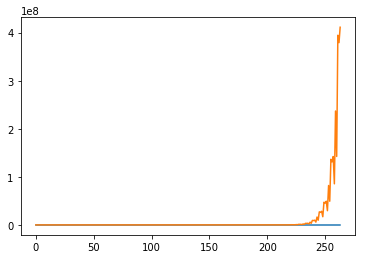

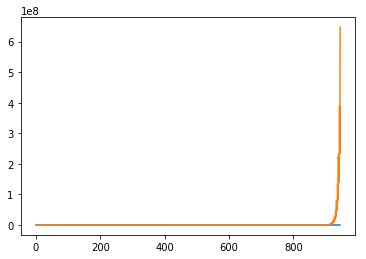

In [14]:
"""
@def   : exact steepest descent method
@param : x is vector 
@return: a vector 
"""
def backtracking_steepest_descent(x0):  
    global cl
    global cq
    cl = []
    cq = []
    x = [x0]           
    p = -grad_objective_func(x0) 
    global count
    count = 0
    while norm(p) > 1e-9:                                       
        a = backtracking(objective_func, grad_objective_func, p, x[-1], c1, ro) 
        x.append(x[-1] + a*p)                   
        p = -grad_objective_func(x[-1])         
        count += 1
        cl.append(np.linalg.norm(x[-1] - [1.,1.])/np.linalg.norm(x[-2] - [1.,1.]))
        cq.append(np.linalg.norm(x[-1] - [1.,1.])/np.linalg.norm(x[-2] - [1.,1.])**2)
    print("iterations:", count)
    return x[-1]

x0 = np.array([1.2, 1.2])
x = backtracking_steepest_descent(x0)
print(x)

plt.plot(np.arange(count),cl)
plt.plot(np.arange(count),cq)

x0 = np.array([-1.2, 1])
x = backtracking_steepest_descent(x0)
print(x)

plt.figure()
plt.plot(np.arange(count),cl)
plt.plot(np.arange(count),cq)

In [15]:
c1 = 1e-4
x_opt = np.array([1., 1.])
ro = 0.9
a = 1
cl = []
cq = []

iterations: 7
[1. 1.]
iterations: 20
[1. 1.]


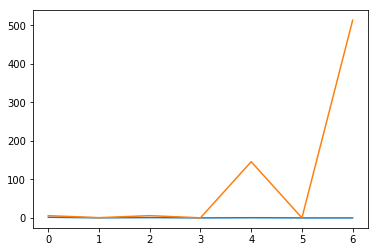

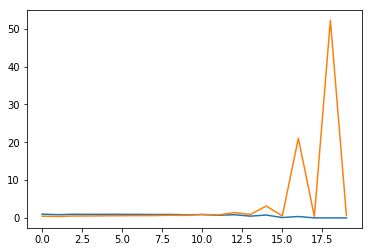

In [16]:
"""
@def   : Newton's method
@param : x is vector 
@return: a vector 
"""
def newton_method(x0):
    global cl
    global cq
    cl = []
    cq = []
    x = [x0]
    p = -grad_objective_func(x0)
    h = hessian_func(x0)
    global count
    count = 0
    while norm(p) > 1e-9:
        newton_dir = np.linalg.solve(h, p)
        a = backtracking(objective_func, grad_objective_func, newton_dir, x[-1], c1, ro)
        x.append(x[-1] + a*newton_dir)
        p = -grad_objective_func(x[-1])
        h = hessian_func(x[-1])
        count += 1
        cl.append(np.linalg.norm(x[-1] - [1.,1.])/np.linalg.norm(x[-2] - [1.,1.]))
        cq.append(np.linalg.norm(x[-1] - [1.,1.])/np.linalg.norm(x[-2] - [1.,1.])**2)
    print("iterations:", count)
    return x[-1]

x0 = np.array([1.2, 1.2])
x = newton_method(x0)
print(x)

plt.plot(np.arange(count),cl)
plt.plot(np.arange(count),cq)

x0 = np.array([-1.2, 1])
x = newton_method(x0)
print(x)

plt.figure()
plt.plot(np.arange(count),cl)
plt.plot(np.arange(count),cq)

# Task 4: Heavy Ball Method

In [17]:
c1 = 1e-4
x_opt = np.array([1., 1.])
a = 10**-3
B = 0.9
cl = []
cq = []

iterations: 3814
[1. 1.]
iterations: 4681
[1. 1.]


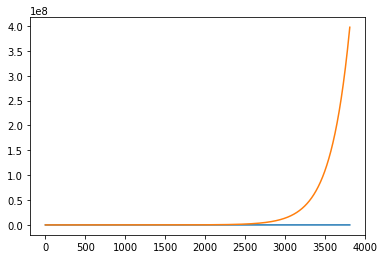

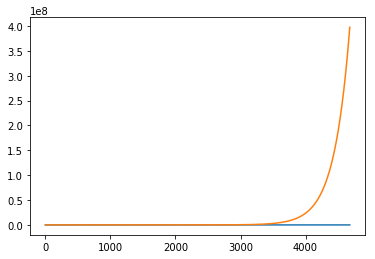

In [18]:
"""
@def   : exact steepest descent method
@param : x is vector 
@return: a vector 
"""
def heavyball(x0):  
    global cl
    global cq
    cl = []
    cq = []
    x = [x0]          
    p = -grad_objective_func(x0) 
    global a
    x.append(x[0] + a*p)
    p = -grad_objective_func(x[-1])
    global count
    count = 0
    while norm(p) > 1e-9: 
        x.append(x[-1] + a*p + B*(x[-1] - x[-2]))
        #print(x[-1])
        p = -grad_objective_func(x[-1])         
        count += 1
        cl.append(np.linalg.norm(x[-1] - [1.,1.])/np.linalg.norm(x[-2] - [1.,1.]))
        cq.append(np.linalg.norm(x[-1] - [1.,1.])/np.linalg.norm(x[-2] - [1.,1.])**2)
    print("iterations:", count)
    return x[-1]


x0 = np.array([1.2, 1.2])
x = heavyball(x0)
print(x)

plt.figure()
plt.plot(np.arange(count),cl)
plt.plot(np.arange(count),cq)

x0 = np.array([-1.2, 1.])
x = heavyball(x0)
print(x)

plt.figure()
plt.plot(np.arange(count),cl)
plt.plot(np.arange(count),cq)